<a href="https://colab.research.google.com/github/shinji-ohkubo/CfC/blob/main/ltc_irregularly_sampled_time_pip_editable.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%cd /home/demerzel/workspace/LTCs/ncps

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
def inf(msg, style, wdth): inf = widgets.Button(description=msg, disabled=True, button_style=style, layout=widgets.Layout(min_width=wdth));display(inf)


Mounted at /content/drive


In [ ]:
#@markdown # git clone to google drive
google_drive_folder = "Colab Notebooks" #@param {type:"string"}
git_colone_URL= "https://github.com/mlech26l/ncps.git" #@param {type:"string"}
project_directory = "ncps" #@param {type:"string"}
branch = "master" #@param {type:"string"}
from IPython.utils import capture
from IPython.display import clear_output
import os
import time
import ipywidgets as widgets

clear_output()
print(f'google_drive_folder:{google_drive_folder}')
main_path = os.path.join('/content/drive/MyDrive',google_drive_folder)

if not os.path.exists(main_path):
  print(f'[1;31mGdrive not connected.({main_path})')
else:
  print(f"cd {main_path}")
  %cd $main_path

  project_path = os.path.join(main_path, project_directory)
  if not os.path.exists(project_path):
    fgitclone = "git clone --depth 1"
    print(f"git clone -q --branch master {git_colone_URL}: {project_directory}")
    print("[0;33mConnecting...")
    !git clone -q --branch $branch $git_colone_URL $project_directory
    !cd $main_path/$project_directory
    !git reset --hard
    !git checkout main
    !git pull

    #clear_output()
    print("[0;33mDone")
    if os.path.exists(project_directory):
      inf('\u2714 Done','success', '50px')
      clear_output()
    else:
      inf('\u2718 Failed','danger', '50px')
      #clear_output()
  else:
    clear_output()
    print("[0;33mAlready Clone")
    inf('\u2714 Done','success', '50px')

Already Clone


Button(button_style='success', description='✔ Done', disabled=True, layout=Layout(min_width='50px'), style=But…

In [ ]:

# Install dependencies if they are not installed yet
#!pip install ncps
#print(f"project_directory = {project_path}")
clear_output()
ncp_package_path = project_path
print(f"ncp_package_path = {ncp_package_path}")

#!pwd
!echo $ncp_package_path
#!ls -a
%cd $ncp_package_path
!pwd
!pip install -r requirements.txt
#!pwd
!pip install --editable . --user
#print("[0;33mAlready Clone")
inf('\u2714 Done','success', '50px')

ncp_package_path = /content/drive/MyDrive/Colab Notebooks/ncps
/content/drive/MyDrive/Colab Notebooks/ncps
/content/drive/MyDrive/Colab Notebooks/ncps
/content/drive/MyDrive/Colab Notebooks/ncps
Obtaining file:///content/drive/MyDrive/Colab%20Notebooks/ncps
  Preparing metadata (setup.py) ... done
  Attempting uninstall: ncps
    Found existing installation: ncps 0.0.8
    Uninstalling ncps-0.0.8:
      Successfully uninstalled ncps-0.0.8
  Running setup.py develop for ncps


Button(button_style='success', description='✔ Done', disabled=True, layout=Layout(min_width='50px'), style=But…

In [ ]:
!python -c "import ncps"
!python -c "from ncps import wirings"


In [ ]:
import numpy as np
import os
from tensorflow import keras
import ncps
from ncps import wirings
#from ncps import wirings
from ncps.tf import LTC

import matplotlib.pyplot as plt

## Generating synthetic sinusoidal training data

The time dimension store the information of how much time has been elapsed **relative** since the last datapoint (i.e.,  don't confuse with the *absolute* time)


data_x.shape:  (1, 48, 2)
data_t.shape:  (1, 48, 1)
data_y.shape:  (1, 48, 1)


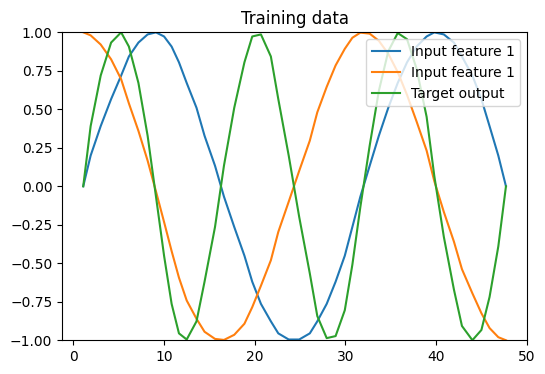

In [ ]:
N = 48 # Length of the time-series
# Input feature is a sine and a cosine wave
data_x = np.stack(
    [np.sin(np.linspace(0, 3 * np.pi, N)), np.cos(np.linspace(0, 3 * np.pi, N))], axis=1
)
data_x = np.expand_dims(data_x, axis=0).astype(np.float32)  # Add batch dimension
data_t = np.random.default_rng().uniform(0.8,1.2, size=(1,N,1))
# Irregularly sampled time (uniform between 0.8 and 1.2 seconds)
# Target output is a sine with double the frequency of the input signal
data_y = np.sin(np.linspace(0, 6 * np.pi, N)).reshape([1, N, 1]).astype(np.float32)
print("data_x.shape: ", str(data_x.shape))
print("data_t.shape: ", str(data_t.shape))
print("data_y.shape: ", str(data_y.shape))

# Let's visualize the training data
plt.figure(figsize=(6, 4))
# To conver the relative time steps into absolute time,
# we have to do a "cumulative summation" (np.cumsum)
plt.plot(np.cumsum(data_t[0,:,0]), data_x[0, :, 0], label="Input feature 1")
plt.plot(np.cumsum(data_t[0,:,0]), data_x[0, :, 1], label="Input feature 1")
plt.plot(np.cumsum(data_t[0,:,0]), data_y[0, :, 0], label="Target output")
plt.ylim((-1, 1))
plt.title("Training data")
plt.legend(loc="upper right")
plt.show()


### A NCP model with irregularly sampled input

In [ ]:
fc_wiring = wirings.AutoNCP(24, 1)  # 24 units, 1 of which is a motor neuron

input_values = keras.Input(shape=(None, 2)) # Sequence length and feature dimension
input_time = keras.Input(shape=(None,1)) # Sequence length dimension

random_dense_layer = keras.layers.Dense(32,activation="tanh") # linear layer
ltc_layer = LTC(fc_wiring, return_sequences=True)

x = random_dense_layer(input_values) # Feed values into linear layer
x = ltc_layer((x,input_time)) # feed values and time as pair into LTC RNN

model = keras.Model(inputs=(input_values,input_time),outputs=x)

model.compile(
    optimizer=keras.optimizers.Adam(0.01), loss='mean_squared_error'
)

model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, None, 2)]            0         []                            
                                                                                                  
 dense (Dense)               (None, None, 32)             96        ['input_1[0][0]']             
                                                                                                  
 input_2 (InputLayer)        [(None, None, 1)]            0         []                            
                                                                                                  
 ltc (LTC)                   (None, None, 1)              5514      ['dense[0][0]',               
                                                                     'input_2[0][0]']         

In [ ]:
# Train the model for 400 epochs (= training steps), input date is now a pair (values, elapsed time)
hist = model.fit(x=(data_x, data_t), y=data_y, batch_size=1, epochs=400,verbose=1)

Epoch 1/400
1/1 [==============================] - 7s 7s/step - loss: 0.6238
Epoch 2/400
1/1 [==============================] - 0s 62ms/step - loss: 0.5237
Epoch 3/400
1/1 [==============================] - 0s 69ms/step - loss: 0.4737
Epoch 4/400
1/1 [==============================] - 0s 69ms/step - loss: 0.4552
Epoch 5/400
1/1 [==============================] - 0s 60ms/step - loss: 0.4450
Epoch 6/400
1/1 [==============================] - 0s 64ms/step - loss: 0.4293
Epoch 7/400
1/1 [==============================] - 0s 64ms/step - loss: 0.4069
Epoch 8/400
1/1 [==============================] - 0s 61ms/step - loss: 0.3837
Epoch 9/400
1/1 [==============================] - 0s 64ms/step - loss: 0.3659
Epoch 10/400
1/1 [==============================] - 0s 70ms/step - loss: 0.3535
Epoch 11/400
1/1 [==============================] - 0s 67ms/step - loss: 0.3394
Epoch 12/400
1/1 [==============================] - 0s 63ms/step - loss: 0.3183
Epoch 13/400
1/1 [==============================] -